In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

In [2]:
!ls

checking.ipynb		  hadd1.root	    hadd.root
cPMinBiasCorrectPaths.sh  hadd2.root	    hadd.sh
cPMinBias.txt		  hadd3.root	    MinBiasCorrectPaths.sh
file.root		  hadd4.root	    NNrate_MinBias.pdf
Fix_paths.ipynb		  hadded	    nohup.out
hadd0.root		  hadd_of_hadds.sh  rateAnalysis.ipynb


In [3]:
!pwd

/uscms_data/d3/rmarroqu/el8cmsL1trigger_Analysis/work/CMSSW_14_0_0_pre3/src/MinBias


In [4]:
!pwd

/uscms_data/d3/rmarroqu/el8cmsL1trigger_Analysis/work/CMSSW_14_0_0_pre3/src/MinBias


In [5]:
f = uproot.open("/uscms_data/d3/rmarroqu/el8cmsL1trigger_Analysis/work/CMSSW_14_0_0_pre3/src/MinBias/hadded/complete_hadd.root")

lxplus files...

In [6]:
#f = uproot.open("root://cmsxrootd.fnal.gov///store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/14X/v38/MinBias_TuneCP5_14TeV-pythia8/MinBias_131_L1Fix_IBv9_wTT/240412_211203/0000/test_100.root")

### Event Selection

In [7]:
events = f["Events"].arrays(["L1puppiExtJetSC4_pt", "L1puppiExtJetSC4_eta", "L1puppiExtJetSC4_llpTagScore"]) #retrieving the jets and objects of interest

In [8]:
mask_jets80 = (events["L1puppiExtJetSC4_llpTagScore"] > 0.80) & (np.abs(events["L1puppiExtJetSC4_eta"]) < 2.4) #Simultaneous eta and llpScore cuts
mask_jets95 = (events["L1puppiExtJetSC4_llpTagScore"] > 0.95) & (np.abs(events["L1puppiExtJetSC4_eta"]) < 2.4) #Simultaneous eta and llpScore cuts

In [9]:
mask_jets80

<Array [[True, True, True, ..., False, False], ...] type='3259988 * var * bool'>

In [10]:
event_selection80 = ak.num(events[mask_jets80], axis=1)["L1puppiExtJetSC4_pt"] > 0 #counts jets that passed and applies cut, i.e, there is at least one jet in the event that passes
event_selection95 = ak.num(events[mask_jets95], axis=1)["L1puppiExtJetSC4_pt"] > 0

In [11]:
Events80 = events[event_selection80] #selection of events that pass cuts
Events95 = events[event_selection95]

In [12]:
Events80[Events80["L1puppiExtJetSC4_llpTagScore"][0:, 0] < 0]["L1puppiExtJetSC4_llpTagScore"]

<Array [[-1, 0.957, 0.931, ..., -1, -1, -1], ...] type='80145 * var * float32'>

In [13]:
leadPt80 = Events80["L1puppiExtJetSC4_pt"][(Events80["L1puppiExtJetSC4_llpTagScore"] > 0.80) & (np.abs(Events80["L1puppiExtJetSC4_eta"]) < 2.4)][:, 0] #selecting jets with score > 0.80 and taking pT of lead Jet with llpScore > 0.80 of selected events
leadPt95 = Events95["L1puppiExtJetSC4_pt"][(Events95["L1puppiExtJetSC4_llpTagScore"] > 0.95) & (np.abs(Events95["L1puppiExtJetSC4_eta"]) < 2.4)][:, 0] #electing jets with score > 0.95 and pT of lead Jet with llpScore > 0.95 of selected events

### Plotting

In [14]:
import matplotlib.pyplot as plt

In [15]:
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

In [16]:
ZeroBiasRate = 11.2456*2544 #kHZ

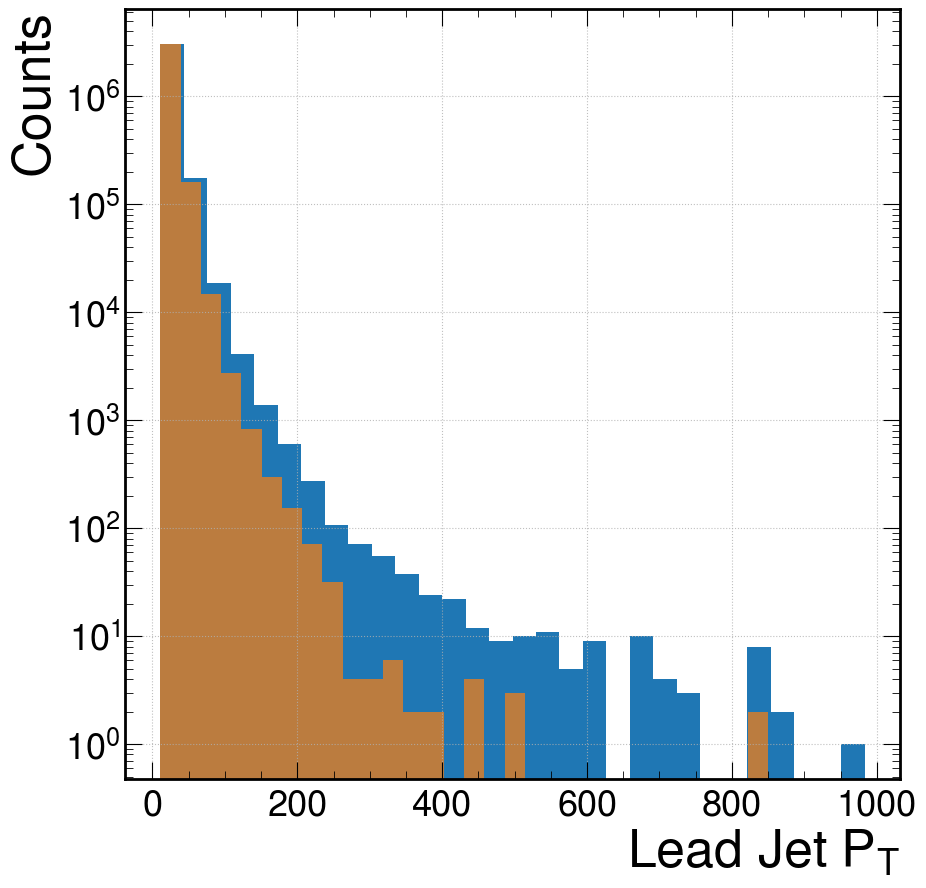

In [17]:
(pTcounts_score80, pTbins_score80, _) = plt.hist(leadPt80, bins=30)
(pTcounts_score95, pTbins_score95, _) = plt.hist(leadPt95, bins=30, alpha=0.7)
plt.yscale("log")
plt.ylabel("Counts")
plt.xlabel("Lead Jet $P_T$")
plt.grid(True)

In [18]:
pt_ths = []
bin_centers95 = []
for i in range (len(pTbins_score80)-1):
    bc08 = (pTbins_score80[i+1] + pTbins_score80[i])/2
    pt_ths.append(bc08)
    bc09 = (pTbins_score95[i+1] + pTbins_score95[i])/2
    bin_centers95.append(bc09)

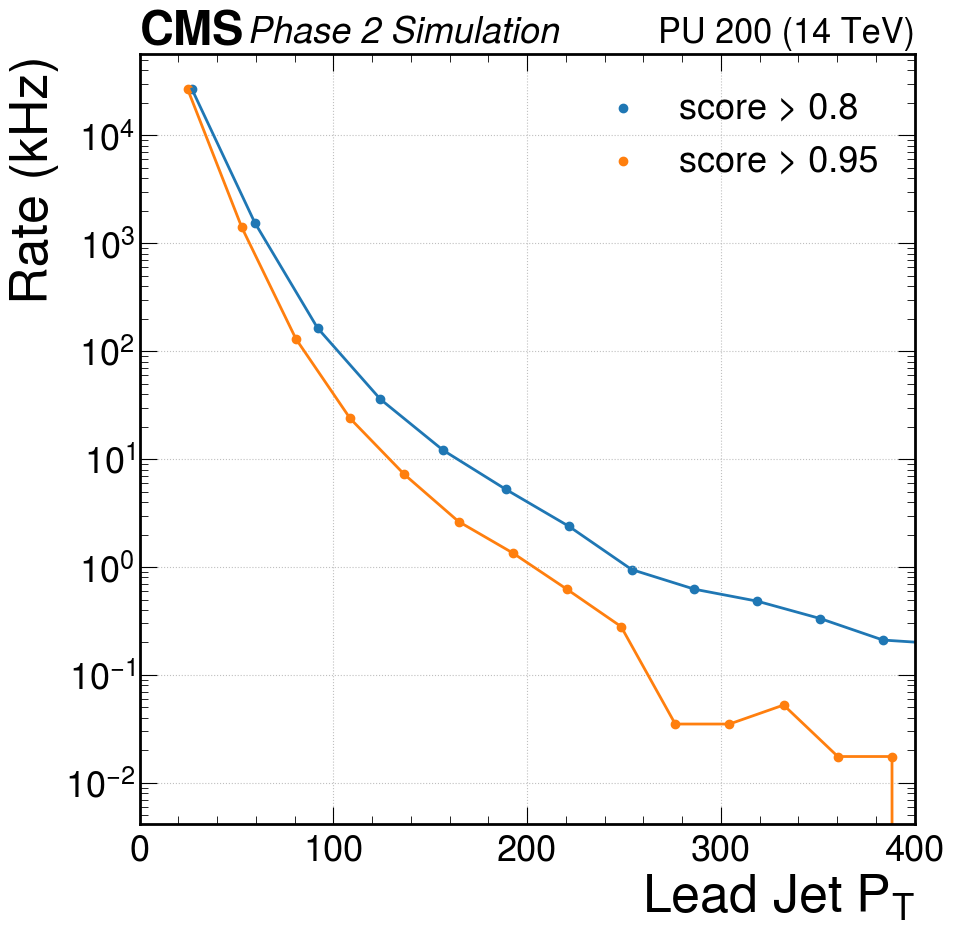

In [19]:
plt.scatter(pt_ths, (pTcounts_score80/len(events))*ZeroBiasRate, label = "score > 0.8")
plt.plot(pt_ths, (pTcounts_score80/len(events))*ZeroBiasRate)

plt.scatter(bin_centers95, (pTcounts_score95/len(events))*ZeroBiasRate, label = "score > 0.95")
plt.plot(bin_centers95, (pTcounts_score95/len(events))*ZeroBiasRate)

hep.cms.text("Phase 2 Simulation")
hep.cms.lumitext("PU 200 (14 TeV)")

plt.yscale("log")
plt.ylabel("Rate (kHz)" )
plt.xlabel("Lead Jet $P_T$")
plt.xlim(0,400)
plt.legend()
plt.grid(True)
#plt.savefig("NNrate_MinBias.pdf", format='pdf',  bbox_inches='tight')

Now, using $P_T$ thresholds instead of histograms:

In [28]:
pt_ths = np.linspace(20, 420, 21)

For each $P_T$ threshold, count the number of events above such $P_T$ threshold:

In [46]:
event_count80 =[]
event_count95 = []
for pt in pt_ths:
    if pt == 20:
        pt = 20+10
    event_count80.append(( len(leadPt80[leadPt80 > pt])/len(events) )*ZeroBiasRate )
    event_count95.append( (len(leadPt95[leadPt95 > pt]) / len(events) )*ZeroBiasRate )


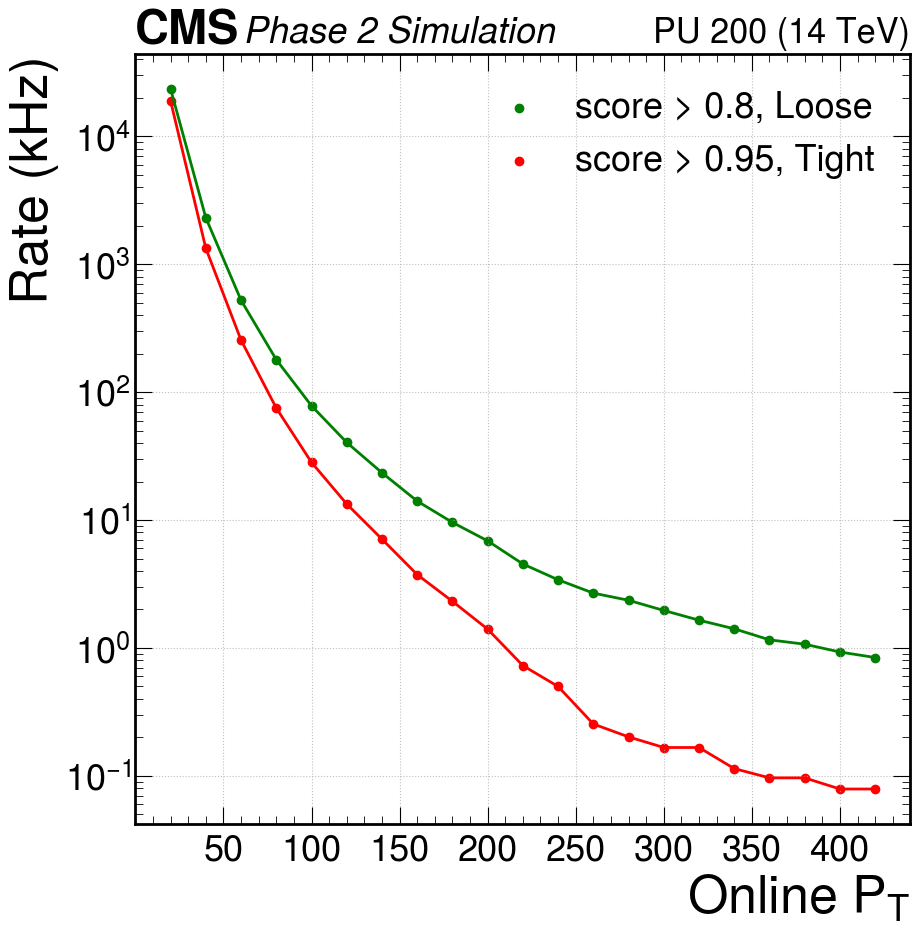

In [52]:
plt.scatter(pt_ths, event_count80, label = "score > 0.8, Loose", c="green")
plt.plot(pt_ths, event_count80, c="green")

plt.scatter(pt_ths, event_count95, label = "score > 0.95, Tight", c="red")
plt.plot(pt_ths, event_count95, c="red")

hep.cms.text("Phase 2 Simulation")
hep.cms.lumitext("PU 200 (14 TeV)")

plt.yscale("log")
plt.ylabel("Rate (kHz)" )
plt.xlabel("Online $P_T$")
plt.xticks(np.arange(50, 421, 50))
#plt.xlim(0,400)

plt.legend()
plt.grid(True)

In [ ]:
!pwd

/uscms_data/d3/rmarroqu/cmsL1trigger_Analysis/work/CMSSW_14_0_0_pre3/src/MinBias


In [ ]:
events

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='299 * {run: uint32, lumino...'>

In [ ]:
events["run"]

<Array [] type='0 * uint32'>

In [ ]:
events["L1puppiExtJetSC4_btagScore"]

<Array [[0.504, 0.637, 0.304, ..., -1, -1, -1], ...] type='299 * var * float32'>

In [ ]:
l = []

In [ ]:
i=0

In [ ]:
for nev in events:
    if i == 10: break
    print(i)
    #print(events["event"])
    l.append(events["L1puppiExtJetSC4_llpTagScore"])
    i+=1

0
1


Shouldn't I be getting the same event #'s? at every iteration?

In [ ]:
l[0][0]

<Array [0.144, 0.981, 0.977, 0.959, ..., -1, -1, -1, -1] type='16 * float32'>